In [2]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile

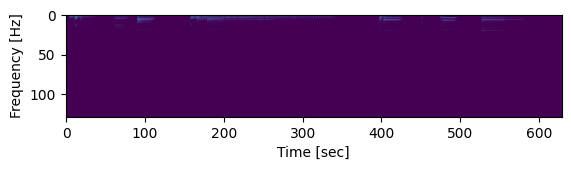

((141120, 2), 44100)

In [25]:
sample_rate, samples = wavfile.read('../audio_processing/samples/sample_a.wav')
frequencies, times, spectrogram = signal.spectrogram(samples[:,1], sample_rate)
plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()
samples.shape, sample_rate

In [37]:
filename = '../audio_processing/samples/sample_d.wav'

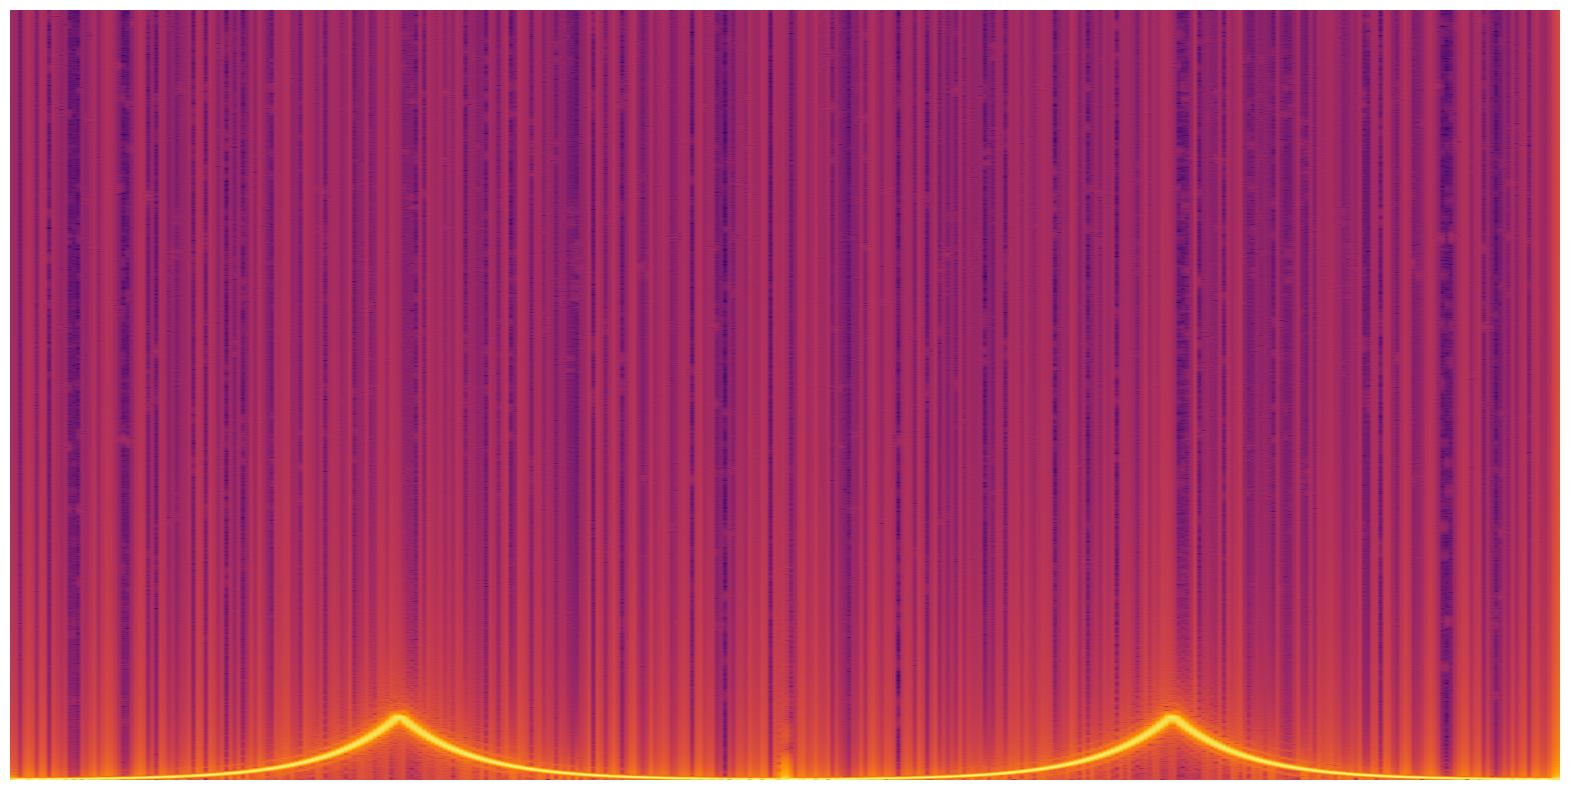

In [35]:
import numpy as np
import scipy.signal as signal
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt

# Load the WAV file
sample_rate, audio = wavfile.read(filename)

# Compute the STFT
window_size = 2048
hop_size = 512
frequencies, times, spectrogram = signal.stft(audio[:,0], fs=sample_rate, window='hamming', nperseg=window_size, noverlap=window_size-hop_size, padded=False)

# Convert the spectrogram to decibels
spectrogram = 20*np.log10(np.abs(spectrogram))

# Create the spectrogram image
fig, ax = plt.subplots(figsize=(20, 10))
im = ax.imshow(spectrogram, origin='lower', cmap='inferno', aspect='auto', extent=[times[0], times[-1], frequencies[0], frequencies[-1]])
ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
ax.axis('off')
# ax.set_xlabel('Time (s)')
# ax.set_ylabel('Frequency (Hz)')

# Save the image
plt.savefig('../audio_processing/output/sample_a.png', dpi=300, bbox_inches='tight', pad_inches=0)


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load the audio file
sample_rate, audio_data = wavfile.read(filename)

# Calculate the Fourier transform of the audio data
fft_data = np.fft.fft(audio_data)

# Calculate the magnitude and phase of the Fourier coefficients
mag_data = np.abs(fft_data)
phase_data = np.angle(fft_data)

# Create a 2D grid for the phaseogram
num_freq_bins = len(mag_data)
num_time_bins = len(audio_data)
time_bins = np.arange(num_time_bins)
freq_bins = np.arange(num_freq_bins)
phase_grid = np.zeros((num_freq_bins, num_time_bins))

# Populate the phase grid with phase information
for i in range(num_freq_bins):
    phase_grid[i, :] = phase_data[i]

# Plot the phaseogram
fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(phase_grid, cmap='jet', aspect='auto')
ax.set_xlabel('Time')
ax.set_ylabel('Frequency')
ax.set_title('Phaseogram')
plt.colorbar(im)
plt.show()


MemoryError: Unable to allocate 275. GiB for an array with shape (192000, 192000) and data type float64